In [53]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
BASE_DIR = os.path.dirname(os.path.abspath(os.path.dirname('.')))
RAW_DATA_DIR = os.path.join(BASE_DIR, 'data', 'raw')

In [3]:
# Read files
train = pd.read_csv(os.path.join(RAW_DATA_DIR, 'train.csv.zip'))
stores = pd.read_csv(os.path.join(RAW_DATA_DIR, 'stores.csv'))
features = pd.read_csv(os.path.join(RAW_DATA_DIR, 'features.csv.zip'))

In [4]:
# Remove special characters from pandas dataframe columns
for d in [train, stores, features]:
    d.columns = [x.replace('_', '') for x in d.columns]
    del d

In [5]:
train.head()

,Store,Dept,Date,WeeklySales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
features.head()

,Store,Date,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## Gráficos

In [8]:
# Como não tem departamento na base de features, vou agregar a informação da tabela de treino
train_agg = train.groupby(['Store', 'Date']).agg({'WeeklySales': 'mean'}).reset_index()
train_agg.head()

,Store,Date,WeeklySales
0,1,2010-02-05,22516.313699
1,1,2010-02-12,22804.964444
2,1,2010-02-19,22081.755753
3,1,2010-02-26,19579.549861
4,1,2010-03-05,21298.721644


In [9]:
# Combino as tabelas
df = train_agg.merge(features, on=['Store', 'Date'], how='left').merge(stores, on=['Store'], how='left')
print(df.shape)
df.head()

(6435, 15)


,Store,Date,WeeklySales,Temperature,FuelPrice,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,22516.313699,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,22804.964444,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,22081.755753,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,19579.549861,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,21298.721644,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df['Year'] = df['Date'].dt.strftime('%Y').astype(int)
df['Month'] = df['Date'].dt.strftime('%m').astype(int)
df['Day'] = df['Date'].dt.strftime('%d').astype(int)
df['Week'] = df['Date'].dt.strftime('%V').astype(int)

Text(0.5, 0, 'Data')

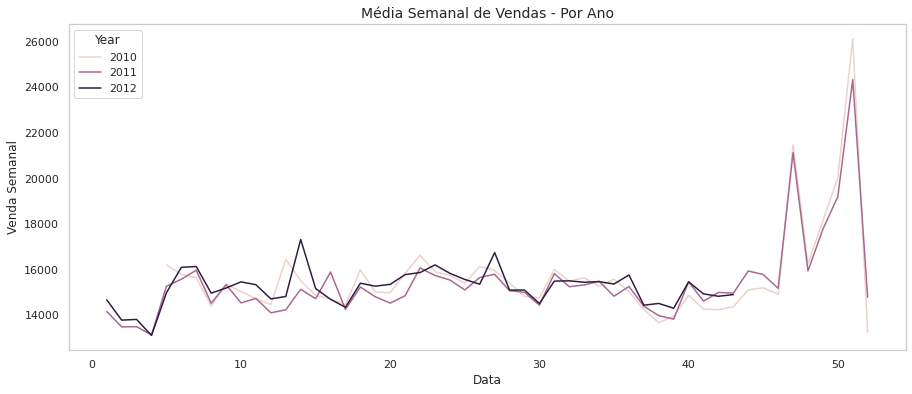

In [54]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Week', y='WeeklySales', data=df.groupby(['Year', 'Week']).agg({'WeeklySales':'mean'}).reset_index(), hue='Year')
plt.grid()
plt.title('Média Semanal de Vendas - Por Ano', fontsize=14)
plt.ylabel('Venda Semanal', fontsize=12)
plt.xlabel('Data', fontsize=12)

/home/matheus/.local/share/virtualenvs/walmart-recruiting-store-sales-forecasting-qonJLJhp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/matheus/.local/share/virtualenvs/walmart-recruiting-store-sales-forecasting-qonJLJhp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


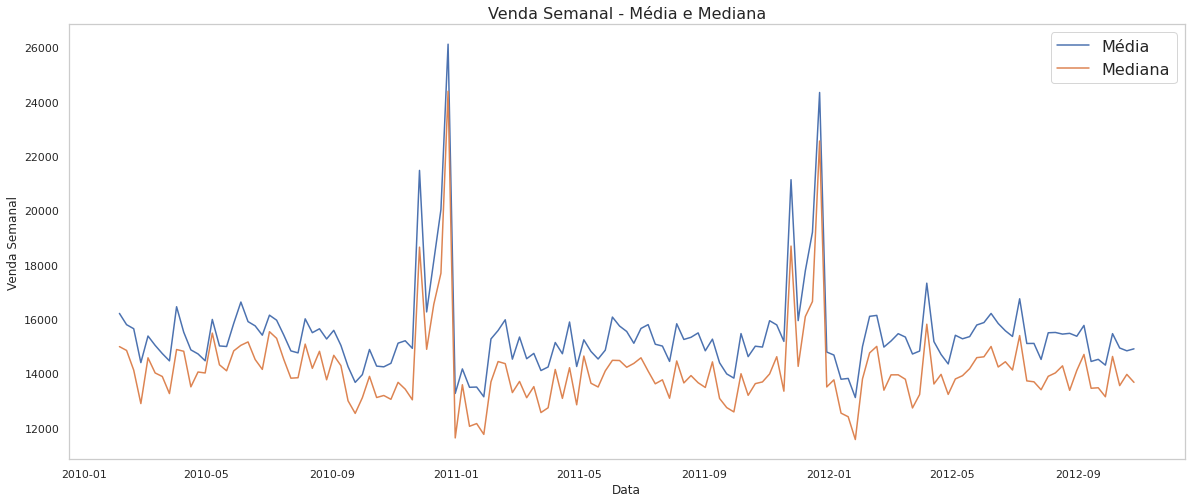

In [55]:
sales_mean = df['WeeklySales'].groupby(df['Date']).mean()
sales_median = df['WeeklySales'].groupby(df['Date']).median()
plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)
sns.lineplot(sales_median.index, sales_median.values)
plt.grid()
plt.legend(['Média', 'Mediana'], loc='best', fontsize=16)
plt.title('Venda Semanal - Média e Mediana', fontsize=16)
plt.ylabel('Venda Semanal', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.show()

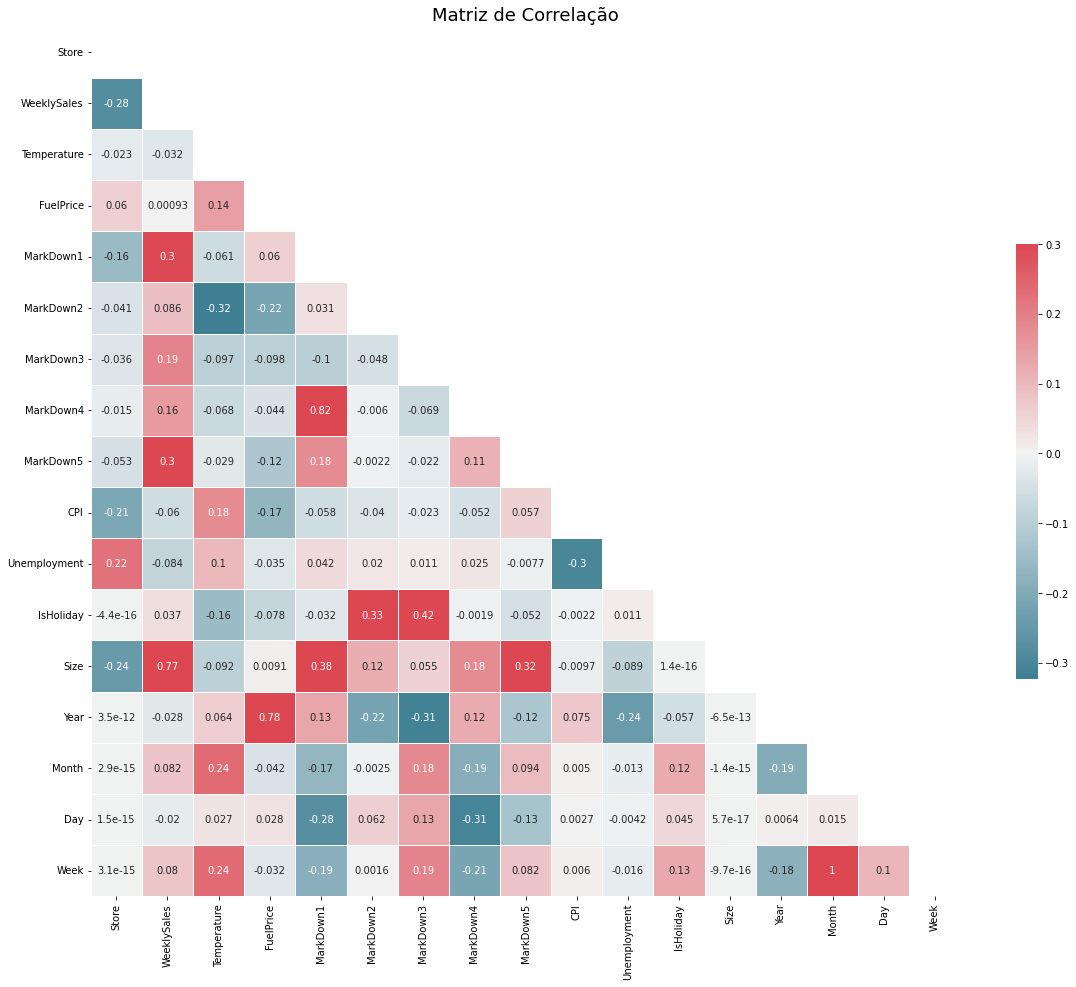

In [27]:
# sns.set(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 16))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Matriz de Correlação', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

Insights:
- A variável de promoção `Markdown` de 1 a 5 não possui forte correlação com a variável `WeeklySales` e possui muitos valores nulos, então podem ser eliminadas.
- Da mesma forma, `FuelPrice` é forte correlacionado com `Year`. Uma delas deve ser eliminada, pois elas possuem informação para um modelo. `Year` não será eliminado, pois ela diferencia as mesmas semanas para `Store` + `Dept`.
- Outras variáveis que possuem fraca correlação com `WeeklySales` podem ser analisadas para ver se são úteis.

In [44]:
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

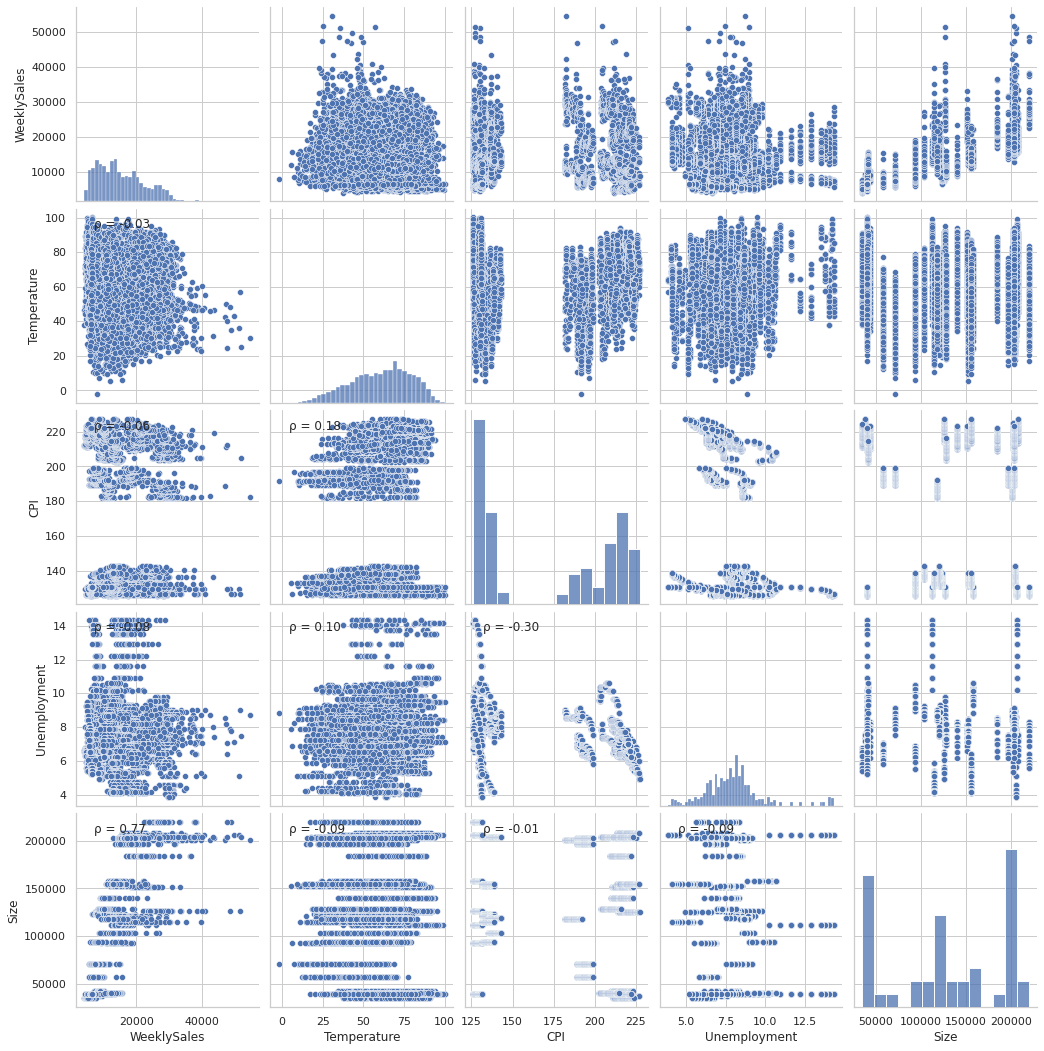

In [57]:
g = sns.pairplot(df, vars=['WeeklySales', 'Temperature', 'CPI', 'Unemployment', 'Size'])
g.map_lower(corrfunc)
g.fig.set_size_inches(15,15)
